In [1]:
# Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import gc
import cv2
import math
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import shutil


def move_and_rename_images(source_folder, destination_folder):
    class_folders = os.listdir(source_folder)

    for class_folder in class_folders:
        class_folder_path = os.path.join(source_folder, class_folder)

        if os.path.isdir(class_folder_path):
            # Process images in each class subfolder
            for filename in os.listdir(class_folder_path):
                source_path = os.path.join(class_folder_path, filename)
                new_filename = f"{class_folder}.{filename}"
                destination_path = os.path.join(
                    destination_folder, new_filename)

                # Move and rename the file
                shutil.move(source_path, destination_path)


# Path to your 'consolidated' folder
consolidated_folder_path = 'consolidated'

# Move and rename images from subfolders to the main 'consolidated' folder
move_and_rename_images(consolidated_folder_path, consolidated_folder_path)

In [3]:
import os
import shutil


def move_and_rename_images(source_folder, destination_folder):
    class_folders = os.listdir(source_folder)

    for class_folder in class_folders:
        class_folder_path = os.path.join(source_folder, class_folder)

        if os.path.isdir(class_folder_path):
            # Process images in each class subfolder
            for filename in os.listdir(class_folder_path):
                source_path = os.path.join(class_folder_path, filename)
                new_filename = f"{class_folder}.{filename}"
                destination_path = os.path.join(
                    destination_folder, new_filename)

                # Move and rename the file
                shutil.move(source_path, destination_path)


consolidated_folder_path = 'valid'

# Move and rename images from subfolders to the main 'consolidated' folder
move_and_rename_images(consolidated_folder_path, consolidated_folder_path)

In [4]:
import os
import pandas as pd


def create_dataframe_from_image_folder(folder_path):
    filepaths = []
    labels = []
    flist = os.listdir(folder_path)

    for f in flist:
        fpath = os.path.join(folder_path, f)
        filepaths.append(fpath)
        label = f.split('.')[0]  # Extracting class name from file name
        labels.append(label)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)

    return df


# Replace the path with the correct path to your folder
folder_path = 'consolidated'
df = create_dataframe_from_image_folder(folder_path)

In [5]:
df

,filepaths,labels
0,consolidated\Autistic,Autistic
1,consolidated\Autistic.0001.jpg,Autistic
2,consolidated\Autistic.0002.jpg,Autistic
3,consolidated\Autistic.0003.jpg,Autistic
4,consolidated\Autistic.0004.jpg,Autistic
...,...,...
2937,consolidated\Non_Autistic.1466.jpg,Non_Autistic
2938,consolidated\Non_Autistic.1467.jpg,Non_Autistic
2939,consolidated\Non_Autistic.1468.jpg,Non_Autistic
2940,consolidated\Non_Autistic.1469.jpg,Non_Autistic


In [6]:
# we are reading 941 images from each class from the balanced dataframe for train set


file_count = 941
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=12))
df_train = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=12).reset_index(drop=True)
print(df_train['labels'].value_counts())
print(len(df_train))

labels
Autistic        941
Non_Autistic    941
Name: count, dtype: int64
1882


In [7]:
import os
import shutil


def move_images_to_class_folders(df, base_folder_path):
    for index, row in df.iterrows():
        # Extract filename and class name
        filename = row['filepaths']
        class_name = row['labels']

        # Create a folder for the class if it doesn't exist
        class_folder_path = os.path.join(base_folder_path, class_name)
        if not os.path.exists(class_folder_path):
            os.makedirs(class_folder_path)

        # Source path for the image file
        source_path = filename

        # Destination path in the class folder
        destination_path = os.path.join(
            class_folder_path, os.path.basename(filename))

        shutil.copy(source_path, destination_path)


move_images_to_class_folders(df_train, 'train')

In [8]:
# we are reading 235 images from each class from the balanced dataframe for valid


file_count = 235
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=124))
df_valid = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=124).reset_index(drop=True)
print(df_valid['labels'].value_counts())
print(len(df_valid))

labels
Autistic        235
Non_Autistic    235
Name: count, dtype: int64
470


In [9]:
move_images_to_class_folders(df_valid, 'valid')

In [10]:
# we are reading 294 images from each class from the balanced dataframe for test set

file_count = 294
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=124))
df_test = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=124).reset_index(drop=True)
print(df_test['labels'].value_counts())
print(len(df_test))

labels
Non_Autistic    294
Autistic        294
Name: count, dtype: int64
588


In [11]:
move_images_to_class_folders(df_valid, 'test')

In [12]:
#printing the total number of  train, valid and test images

!echo '.........Training data...........'
print( df_train['labels'].value_counts())
print( 'Total train images' ,df_train['labels'].value_counts().sum())

!echo '.........Valid data..............'
print( df_valid['labels'].value_counts())
print( 'Total valid images' ,df_valid['labels'].value_counts().sum())

!echo '.........Test data...........'
print( df_test['labels'].value_counts())
print( 'Total test images' ,df_test['labels'].value_counts().sum())

sum1= df_train['labels'].value_counts().sum() + df_valid['labels'].value_counts().sum() + df_test['labels'].value_counts().sum()

print('......Total dataset images =  ', sum1,'.....')

'.........Training data...........'
labels
Autistic        941
Non_Autistic    941
Name: count, dtype: int64
Total train images 1882
'.........Valid data..............'
labels
Autistic        235
Non_Autistic    235
Name: count, dtype: int64
Total valid images 470
'.........Test data...........'
labels
Non_Autistic    294
Autistic        294
Name: count, dtype: int64
Total test images 588
......Total dataset images =   2940 .....


In [13]:
# Initilizing the input parameters for the images and batch size
# we are resizing all the images into 224x224 pixels and 3 channels (RGB) will be used
# batch size of 32 images will be transferred at each iteration during training to reduce the computational power
height = 224
width = 224
channels = 3
batch_size = 16
img_shape = (height, width, channels)
img_size = (height, width)

In [14]:
# Libraries

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [15]:
gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, vertical_flip=False,
                         rotation_range=5, width_shift_range=[-.1, .1], height_shift_range=[-.1, .1])

In [16]:
train_gen = gen.flow_from_dataframe(df_train, x_col='filepaths', y_col='labels', target_size=img_size,
                                    class_mode='categorical', batch_size=batch_size, color_mode="rgb")

Found 1882 validated image filenames belonging to 2 classes.


In [17]:
valid_gen = gen.flow_from_dataframe(df_valid, x_col='filepaths', y_col='labels', target_size=img_size,
                                    class_mode='categorical', batch_size=batch_size, color_mode='rgb')

Found 470 validated image filenames belonging to 2 classes.


In [18]:
test_gen = gen.flow_from_dataframe(df_test, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', batch_size=batch_size, color_mode='rgb')

Found 588 validated image filenames belonging to 2 classes.


In [19]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, ZeroPadding2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import Xception

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model


def build_model():
    BaseModel = MobileNetV2(
        weights='imagenet', include_top=False, input_shape=(img_shape))
    BaseModel.trainable = False
    headModel = BaseModel.output
    headModel = BatchNormalization()(headModel)
    headModel = Flatten()(headModel)

    headModel = Dense(512, activation='relu')(headModel)
    headModel = BatchNormalization()(headModel)
    headModel = Dense(512, activation='relu')(headModel)
    headModel = Dropout(0.2)(headModel)
    output = Dense(2, activation='softmax')(headModel)

    model = Model(inputs=BaseModel.input, outputs=output)

    return model


# build the model
model_mobilenet = build_model()
model_mobilenet.summary()


model_mobilenet.compile(optimizer=RMSprop(
    1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
Model = model_mobilenet.fit(
    train_gen,  validation_data=valid_gen,  epochs=50, verbose=1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,641,986 (132.15 MB)

 Trainable params: 32,380,418 (123.52 MB)

 Non-trainable params: 2,261,568 (8.63 MB)

Epoch 1/50


c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 117s 893ms/step - accuracy: 0.6389 - loss: 0.8097 - val_accuracy: 0.7723 - val_loss: 0.5351
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 97s 805ms/step - accuracy: 0.7742 - loss: 0.5227 - val_accuracy: 0.7851 - val_loss: 0.4563
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 89s 737ms/step - accuracy: 0.7919 - loss: 0.4584 - val_accuracy: 0.8277 - val_loss: 0.4363
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 89s 737ms/step - accuracy: 0.8000 - loss: 0.4244 - val_accuracy: 0.8213 - val_loss: 0.4190
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 88s 729ms/step - accuracy: 0.8378 - loss: 0.3611 - val_accuracy: 0.8596 - val_loss: 0.3441
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 92s 763ms/step - accuracy: 0.8583 - loss: 0.3445 - val_accuracy: 0.8553 - val_loss: 0.3530
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 93s 768ms/step - accuracy: 0.8560 - loss: 0.3361 - val_accuracy: 0.8745 - val_loss: 0.2953
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 97s 806ms/step - accuracy: 0.8977 - loss: 0.2659 - va

In [23]:
model_mobilenet.save('Facialmobile_net.keras')

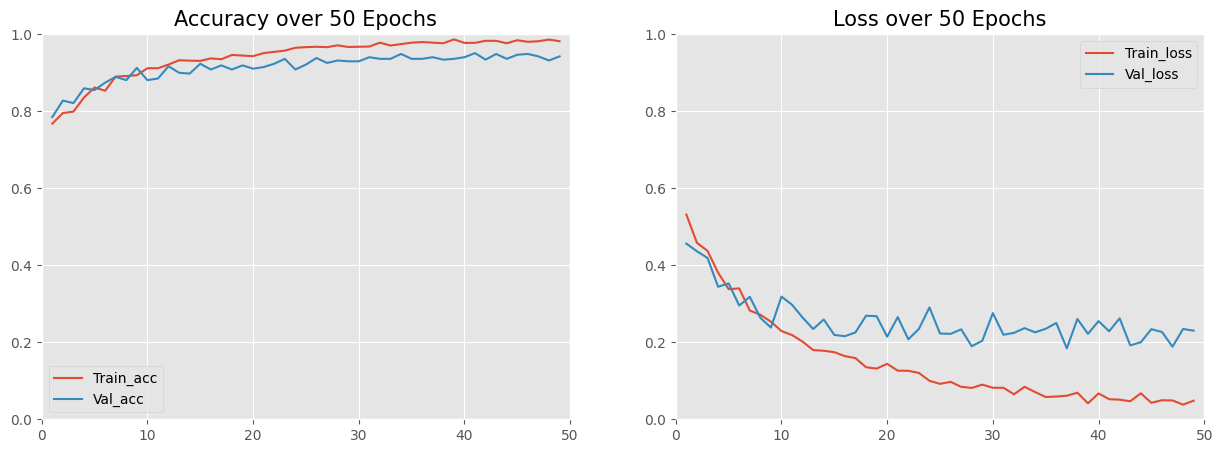

In [24]:
# Plot the accuracy and loss graphs
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.xlim(0, epochs)
    plt.ylim(0, )
    plt.plot(range(1, epochs), acc[1:], label='Train_acc')
    plt.plot(range(1, epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0, epochs)
    plt.ylim(0, )
    plt.plot(range(1, epochs), loss[1:], label='Train_loss')
    plt.plot(range(1, epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)

    plt.show()


plot_acc_loss(Model, 50)

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 421ms/step
Confusion Matrix:
 [[280  14]
 [ 23 271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       294
           1       0.95      0.92      0.94       294

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588



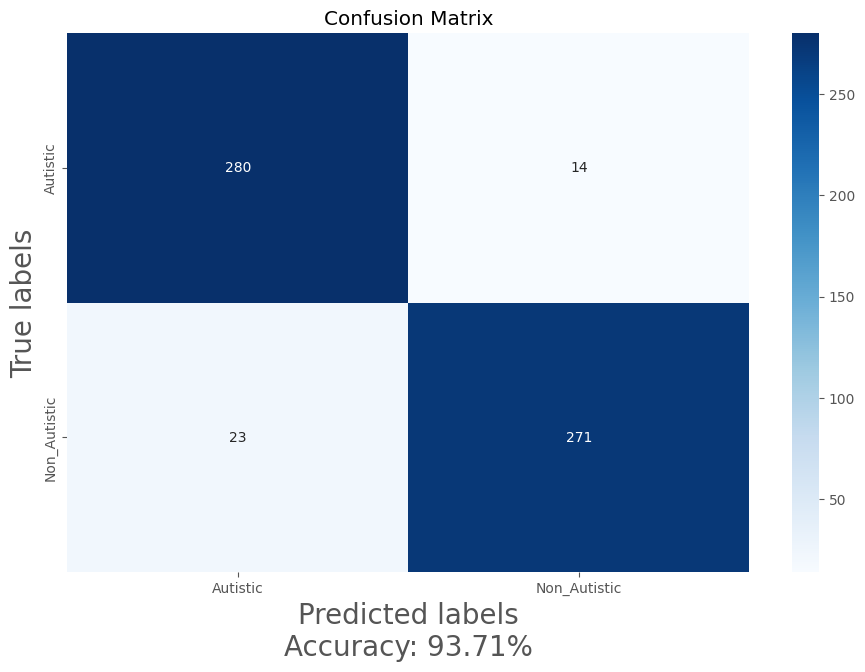

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

eval_generator = test_gen
eval_generator.shuffle = False  # Disable shuffling

# Reset the generator
eval_generator.reset()

# Collect true labels
true_labels = []
for i in range(len(eval_generator)):
    X, y = eval_generator[i]
    true_labels.extend(np.argmax(y, axis=-1))

# Ensure true_labels is a numpy array for later comparison
true_labels = np.array(true_labels)

# Reset the generator again for prediction
eval_generator.reset()

# Predict using the model
steps = int(np.ceil(len(eval_generator)))
predictions = model_mobilenet.predict(eval_generator, steps=steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)

# Ensure lengths are consistent
assert len(predicted_classes) == len(
    true_labels), "Mismatch in predicted and true labels length"

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_labels)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Classification Report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(
    true_labels, predicted_classes))

# Plotting Confusion Matrix
plt.figure(figsize=(11, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=eval_generator.class_indices, yticklabels=eval_generator.class_indices)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy*100:.2f}%', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix')
plt.show()